Perform Gaussian blurring on Mandrill.pgm with standard deviation $\sigma$. Assume space-invariant
blur and a kernel of size ⌈6$\sigma$+1⌉x⌈6$\sigma$+1⌉. Observe the outputs for these values of $\sigma$: 1.6; 1.2; 1.0; 0.6; 0.3
and 0.0.

Reading and displaying input image

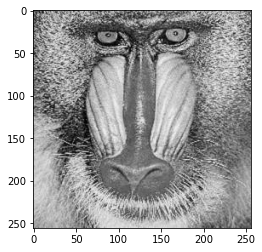

In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

img_mandrill = mpimg.imread('Mandrill.png')
plt.imshow(img_mandrill,'gray')

# Gaussian kernel



In [2]:
import numpy as np
def generate_kernel(sigma):
    k= int(np.ceil(6*sigma+1));  #kernel size
    if k==1:
        return np.ones((k,k)); #to avoid division by 0 when sigma=0.0
    #if kernel size is even then consider the next odd value
    if k%2==0:
        k = k+1;
    #creating empty kernel grid
    kernel = np.zeros((k,k));
    d=k//2 
    for i in range(k):
        for j in range(k):
            kernel[i,j]=np.exp((-(i-d)**2-(j-d)**2)/(2*sigma**2))
    kernel=kernel/np.sum(kernel)
    return kernel
#print(kernel) 
#print(k);
#print(d);

In [3]:
def space_invariant_blur(image,kernel):
    [x,y]=np.shape(image);
    k=len(kernel);
    blurred_image = np.zeros((x, y))
    d = k//2
    if d==0:
        return image
    zero_padded_image = np.zeros((x+2*d, y+2*d))
    zero_padded_image[d:-d, d:-d] = image #fit the image to the center of the zero padded image
    for i in range(d, x+d):
        for j in range(d, y+d):
            patch = zero_padded_image[i-d:i+d+1, j-d:j+d+1] #patch of the input image on which kernel needs to be applied for this iteration
            blurred_image[i-d, j-d] = np.sum(kernel*patch) #apply kernel and sum these values 
    return blurred_image

(-0.5, 255.5, 255.5, -0.5)

<Figure size 432x288 with 0 Axes>

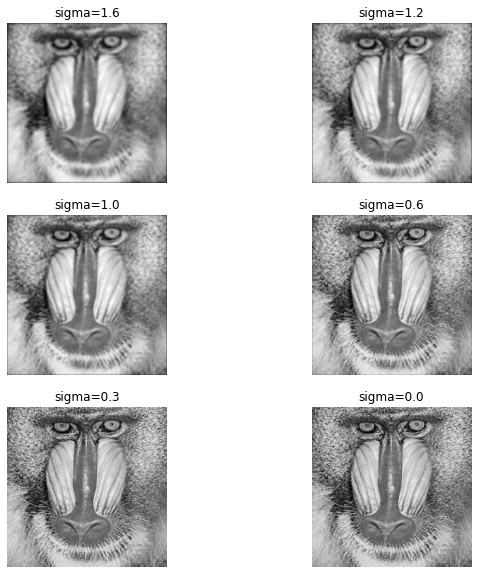

In [19]:
#plotting for different sigma values

plt.figure()
plt. subplots(3,2,figsize=(10,10)) 

plt.subplot(3,2,1)
kernel1=generate_kernel(1.6)
blurred_image1=space_invariant_blur(img_mandrill,kernel1)
plt.imshow(blurred_image1,'gray')
plt.title("sigma=1.6")
plt.axis('off')

plt.subplot(3,2,2)
kernel2=generate_kernel(1.2)
blurred_image2=space_invariant_blur(img_mandrill,kernel2)
plt.imshow(blurred_image2,'gray')
plt.title("sigma=1.2")
plt.axis('off')

plt.subplot(3,2,3)
kernel3=generate_kernel(1.0)
blurred_image3=space_invariant_blur(img_mandrill,kernel3)
plt.imshow(blurred_image3,'gray')
plt.title("sigma=1.0")
plt.axis('off')

plt.subplot(3,2,4)
kernel4=generate_kernel(0.6)
blurred_image4=space_invariant_blur(img_mandrill,kernel4)
plt.imshow(blurred_image4,'gray')
plt.title("sigma=0.6")
plt.axis('off')

plt.subplot(3,2,5)
kernel5=generate_kernel(0.3)
blurred_image5=space_invariant_blur(img_mandrill,kernel5)
plt.imshow(blurred_image5,'gray')
plt.title("sigma=0.3")
plt.axis('off')

plt.subplot(3,2,6)
kernel6=generate_kernel(0.0)
blurred_image6=space_invariant_blur(img_mandrill,kernel6)
plt.imshow(blurred_image6,'gray')
plt.title("sigma=0.0")
plt.axis('off')

